In [44]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, sigmam, sigmap)

%matplotlib inline

In [45]:
delta = 0
J = 1

# Hamiltonian
H = Qobj([[delta/2, J], [J, -delta/2]])

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
times = np.linspace(0, 10, 1000)

result = mesolve(H, psi0, times)

In [46]:
psi_t = np.array(result.states).reshape((len(times), 2))
population = np.abs(psi_t) ** 2

In [47]:
def plot_populations(p0, p1, times):
    fig, ax = plt.subplots()
    
    ax.plot(times, p0, label='Population 0')
    ax.plot(times, p1, label='Population 1')
    ax.set_xlabel('Time') 
    ax.set_ylabel('Population') 
    ax.legend()

    ax.set_ylim(0, 1)
    ax.set_xlim(0, times[-1])
    return fig, ax

In [48]:
def plot_trace(tr, times):
    
    fig, ax = plt.subplots()

    ax.plot(times, tr, label='Trace')
    ax.set_xlabel('Time') 
    ax.set_ylabel(r'Tr[$\rho^2]$')

    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, times[-1])
    return fig, ax

In [49]:
def populationt(delta, J, t):
    return np.array([2*J**2 + delta**2 + 2*J**2*np.cos(t*np.sqrt(4*J**2 + delta**2)), -(2*J**2*(-1 + np.cos(t*np.sqrt(4*J**2 + delta**2))))])/(4*J**2 + delta**2)

populationm = populationt(delta, J, times)

[np.sum(population[:,0] - populationm[0,:])**2, np.sum(population[:,1] - populationm[1,:])**2]

[8.48373608668513e-07, 8.483736086732434e-07]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='Time', ylabel='Population'>)

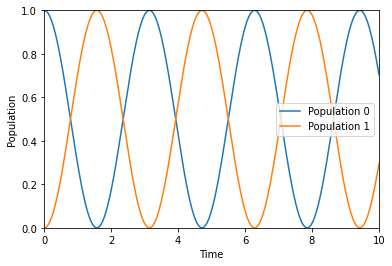

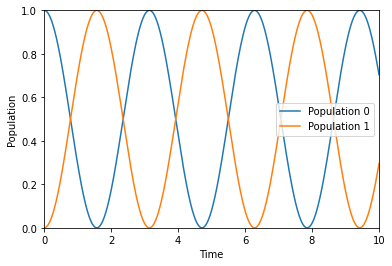

In [50]:
plot_populations(population[:,0], population[:,1], times)
plot_populations(populationm[0,:], populationm[1,:], times)

In [51]:
gamma = 1
result = mesolve(H, psi0, times, [np.sqrt(gamma)*sigmam()])

In [52]:
population = np.abs(np.array(result.states))

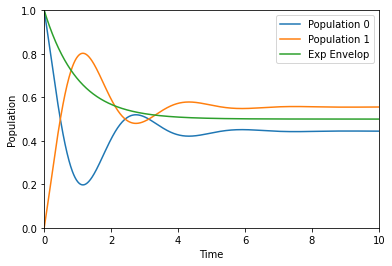

In [53]:
fig, ax = plot_populations(population[:, 0,0], population[:, 1,1], times)
ax.plot(times, np.exp(-gamma*times)*0.5 + 0.5, label='Exp Envelop')
ax.legend()

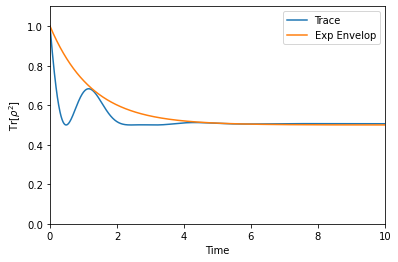

In [54]:
tr = population[:,0,0]**2 + population[:,1,1]**2
fig, ax = plot_trace(tr, times)
ax.plot(times, np.exp(-gamma*times*0.8)*0.5 + 0.5, label='Exp Envelop')
ax.legend()

In [55]:
gamma = 0.1
result = mesolve(H, psi0, times, [np.sqrt(gamma)*sigmap()])

In [56]:
population = np.abs(np.array(result.states))

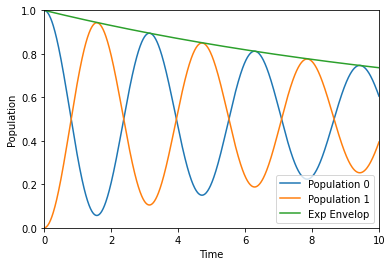

In [57]:
fig, ax = plot_populations(population[:, 0,0], population[:, 1,1], times)
ax.plot(times, np.exp(-gamma*times*0.75)*0.5 + 0.5, label='Exp Envelop')
ax.legend()

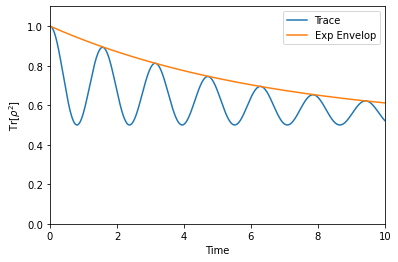

In [58]:
tr = population[:,0,0]**2 + population[:,1,1]**2
fig, ax = plot_trace(tr, times)
ax.plot(times, np.exp(-gamma*times*1.5)*0.5 + 0.5, label='Exp Envelop')
ax.legend()